# Applying the Rule of Five

**Definition:** _There is a 93.75% chance that the median of a population is between the smallest and largest values in any random sample of five from that population._

From Douglas Hubbard - "How to Measure Anything"

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a new random generator with a seed to ensure reproducibility.
SEED = 122807528403841006732342137672332424409
rng = np.random.default_rng(SEED)

In [3]:
# Create random numbers following a uniform distribution.
POPULATION_SIZE = 10_000
uniform = rng.uniform(0, 1, POPULATION_SIZE)

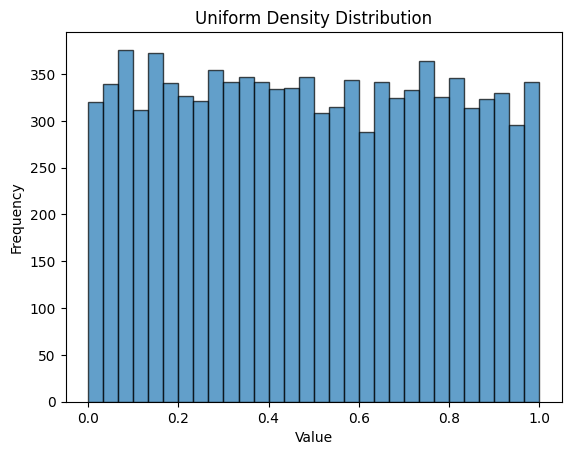

In [4]:
# Show the histogram of the generated uniform distribution.
plt.hist(uniform, bins=30, edgecolor='black', alpha=0.7)

plt.title('Uniform Density Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

In [5]:
def rule_of_five(population: list[float]) -> bool:
    """
    Apply rule of five to a random sample. 
    
    Return True if the median is between the minimum and maximum of a random sample of 5 elements 
    from the population. Otherwise, return False.
    """

    sample = rng.choice(population, 5, replace=False)
    return sample.min() < np.median(population) < sample.max()

In [6]:
TRIAL_COUNT = 10_000

# Apply the rule of five to the uniform distribution.
rule_of_five_results = np.array([rule_of_five(uniform) for _ in range(TRIAL_COUNT)])

# Calculate the proportion of times the rule of five is satisfied.
success_rate = rule_of_five_results.mean()
print(f"Rule of five success rate: {success_rate.mean():.2%}")

Rule of five success rate: 93.96%


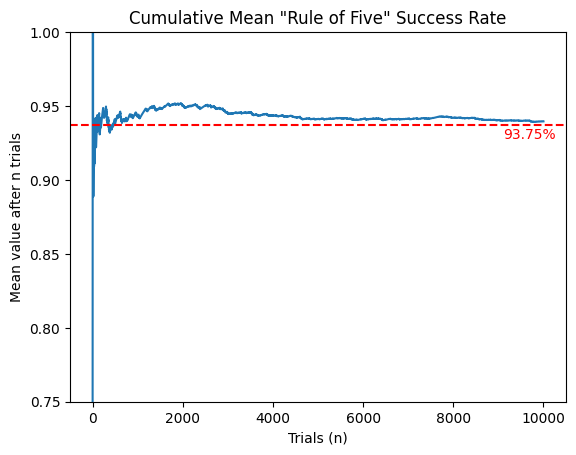

In [7]:
# Render the cumulative mean of the success rate.

cumulative_probability = np.cumsum(rule_of_five_results) / np.arange(1, TRIAL_COUNT + 1)
cumulative_probability = np.insert(cumulative_probability, 0, 0)

plt.plot(cumulative_probability)
plt.ylim(0.75, 1)

expected_value = 0.9375
plt.axhline(expected_value, color='r', linestyle='--')
plt.annotate(f'{expected_value:.2%}', (TRIAL_COUNT, expected_value), textcoords="offset points", 
                xytext=(-10, -10), ha='center', color='red')

plt.title('Cumulative Mean "Rule of Five" Success Rate')
plt.xlabel('Trials (n)')
plt.ylabel('Mean value after n trials')

plt.show()